In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *
import matplotlib.pyplot as plt
from collections import Counter

2023-06-13 16:37:44.963037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 16:37:51.551683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x = []
y = []

f = open("12_06_2023_14_27_16.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(0)

f.close()

f = open("12_06_2023_14_30_18.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(1)

f.close()

f = open("12_06_2023_15_14_35.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(2)

f.close()

x = np.array(x)
#x = x[:,:,0:2]
y = np.array(y)

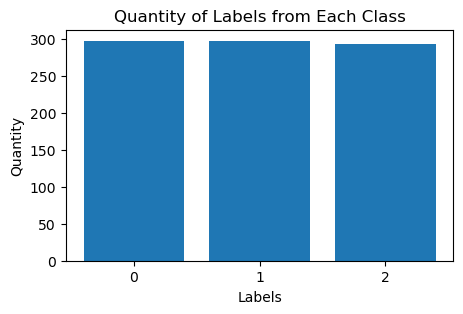

In [4]:
draw_bar_chart(y)

[0 1 2]
3


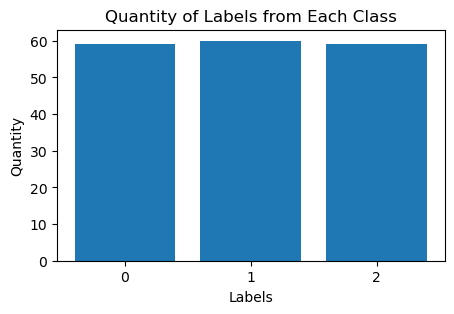

In [5]:
print(np.unique(y))

n_classes = len(np.unique(y))

print(n_classes)

x_train, y_train, x_val, y_val, x_test, y_test = split_and_shuffle(x, y, balanced=True)

draw_bar_chart(y_val)
draw_bar_chart(y_test)

In [6]:
def fc_model(dropout=0.2):
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   #model.add(tf.keras.Input(shape=(21,3)))
   model.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(21,3)))
   model.add(tf.keras.layers.MaxPooling1D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(16, activation='relu'))
   model.add(tf.keras.layers.Dense(3, activation="softmax"))
   return model

In [23]:
input_shape = x.shape[1:]

model = fc_model()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"]
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10000,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 20, 32)            224       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 19, 32)           0         
 g1D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 608)               0         
                                                                 
 dropout_15 (Dropout)        (None, 608)               0         
                                                                 
 dense_30 (Dense)            (None, 16)                9744      
                                                                 
 dense_31 (Dense)            (None, 3)                 51        
                                                     

[0.25497886538505554, 0.949438214302063]

In [8]:
# maior early stopping, dropout, matriz de confusao, alterar batch size, alterar kernel size, transformers

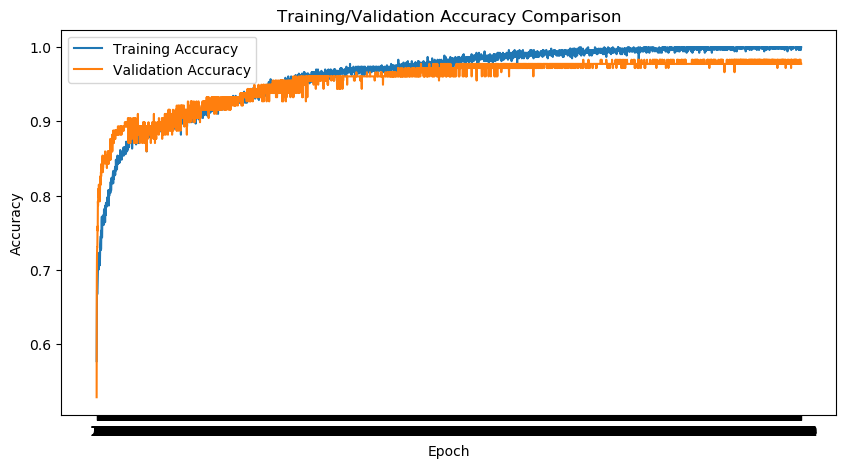

In [24]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

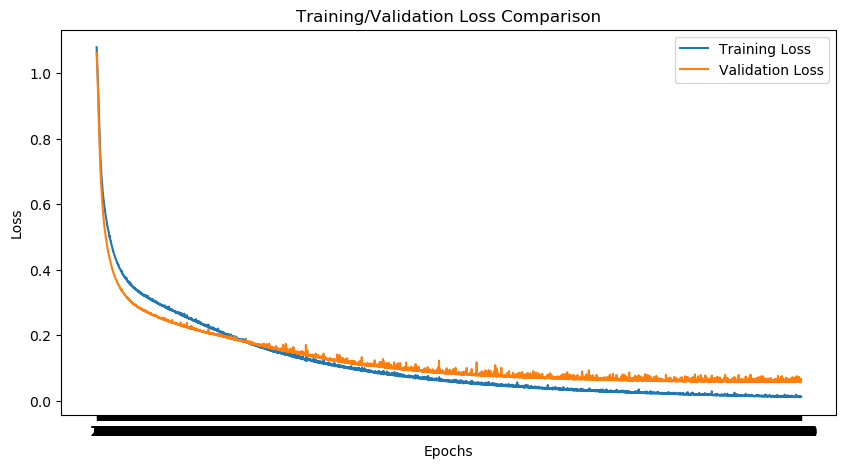

In [25]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

6/6 [==============================] - 0s 2ms/step


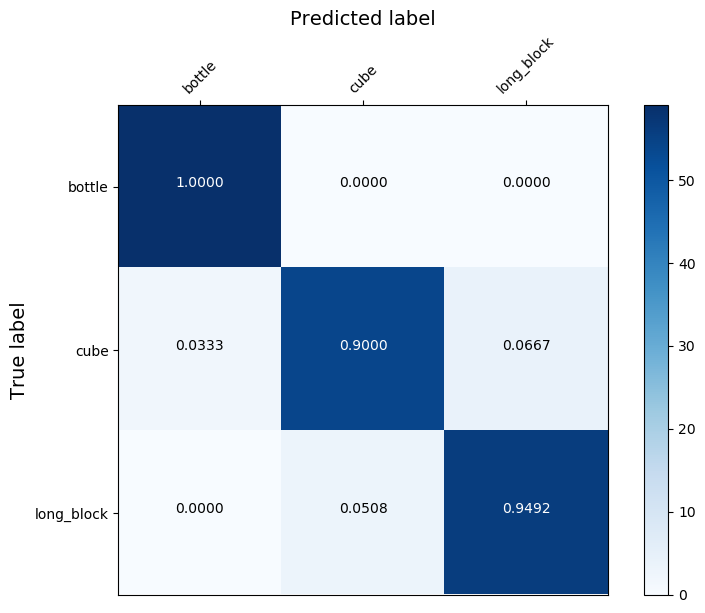

In [26]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
plot_confusion_matrix(y_test, y_pred, ["bottle", "cube", "long_block"])

In [16]:
dropouts=[0.1 * _ for _ in range(6)]
acc = []
loss = []

for d in dropouts:
    model = fc_model(dropout=d)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        metrics=["sparse_categorical_accuracy"]
    )

    callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

    results = model.fit(
        x_train,
        y_train,
        validation_data=(x_val,y_val),
        #validation_split=0.2,
        epochs=100,
        batch_size=16,
        callbacks=callbacks,
    )

    acc.append(results.history["val_sparse_categorical_accuracy"])
    loss.append(results.history["val_loss"])

Epoch 1/100
34/34 [==============================] - 3s 20ms/step - loss: 1.0619 - sparse_categorical_accuracy: 0.5300 - val_loss: 1.0453 - val_sparse_categorical_accuracy: 0.5449
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 1.0413 - sparse_categorical_accuracy: 0.5037 - val_loss: 1.0243 - val_sparse_categorical_accuracy: 0.5562
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 1.0215 - sparse_categorical_accuracy: 0.5562 - val_loss: 1.0044 - val_sparse_categorical_accuracy: 0.5730
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 1.0018 - sparse_categorical_accuracy: 0.5431 - val_loss: 0.9829 - val_sparse_categorical_accuracy: 0.5618
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.9817 - sparse_categorical_accuracy: 0.5674 - val_loss: 0.9581 - val_sparse_categorical_accuracy: 0.5730
Epoch 6/100
34/34 [==============================] - 0s 13ms/step - loss: 0.9580 - sparse_categorical_a

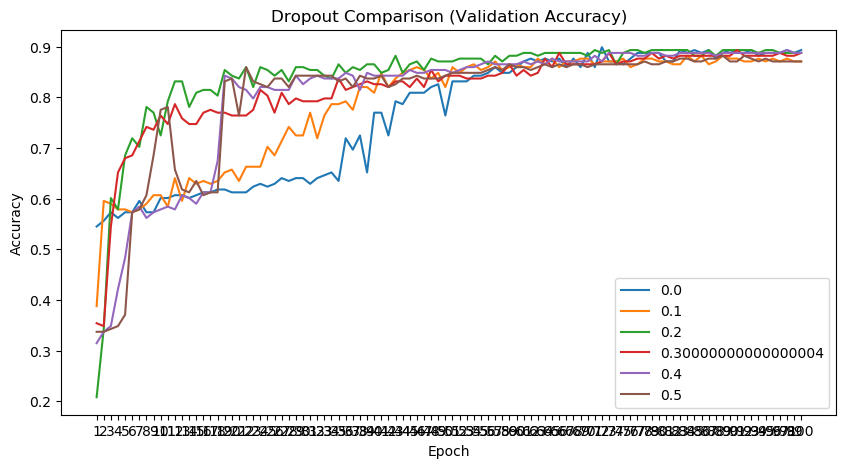

In [17]:
plot_accuracy_comparison(acc, "Dropout Comparison (Validation Accuracy)", dropouts)


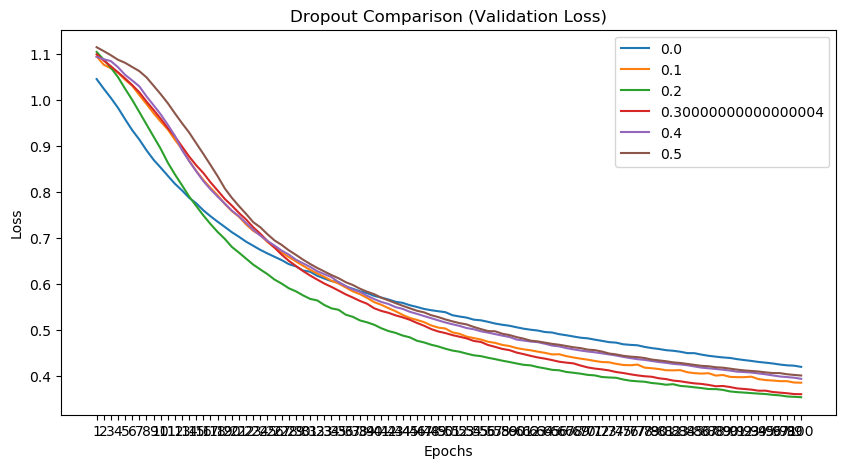

In [18]:
plot_loss_comparison(loss, "Dropout Comparison (Validation Loss)", dropouts)

In [ ]:
# #a = np.array([0,1,0,0,1,0,0,1,0,0])
# #a = np.array([1,1,0,1,1,0,1,1,0,1])
# #a = np.array([2,2,0,2,2,1,2,2,3,2])
# a = np.array([7,7,0,7,7,3,7,7,6,7])

# a = a.reshape((1, a.shape[0],1))

# print(a.shape)

# model.predict(a)

In [ ]:
# model.save('../models/points_conv_1d')

In [ ]:
#model = tf.keras.models.load_model('../models/transformer_numbers')